## Customize Stanford Dogs dataset

When it comes down to working with the provided by TF datasets you just feed them into a model and let the black magic flow. But if you want to change, add more classes and rows it's a huge pain.

Here I provide the script that extracts Stanford Dogs dataset images and labels and saves them into different pickle object that I will use. It's taking a lot of time and space but at the end you will have numpy arrays that you can easily manipulate.


### Load the Stanford Dogs Dataset

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import pickle
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
dataset, info = tfds.load(name="stanford_dogs", with_info=True)


In [4]:
IMG_LEN = 299
IMG_SHAPE = (IMG_LEN, IMG_LEN, 3)
N_BREEDS = 121

training_data = dataset['train']
test_data = dataset['test']


## Extract pictures and labels and save them as pickle objs

In [5]:
retrieved_batches = 1000
distribution_of_labels = []
train_x = []
train_y = []


In [6]:
i = 0

for x in training_data.skip(0):
  if i == retrieved_batches:
    break
  img = x['image'] / 255
  img = tf.image.resize(img, (IMG_LEN, IMG_LEN), method='nearest')
  train_x.append(np.array(img))
  distribution_of_labels.append(x['label'].numpy())
  label = tf.one_hot(np.array(x['label']),N_BREEDS)
  train_y.append(label)
  i += 1
  

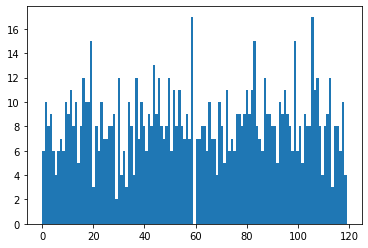

In [7]:
plt.hist(distribution_of_labels, bins=121);

Hmm, that shows that it is somewhat decently distributed but let's print some of the least represented classes.

In [8]:
for x in range(121):
  print(f'{x} occurs {list.count(distribution_of_labels, x)} times')

0 occurs 6 times
1 occurs 10 times
2 occurs 8 times
3 occurs 9 times
4 occurs 6 times
5 occurs 4 times
6 occurs 6 times
7 occurs 7 times
8 occurs 6 times
9 occurs 10 times
10 occurs 9 times
11 occurs 11 times
12 occurs 8 times
13 occurs 10 times
14 occurs 5 times
15 occurs 8 times
16 occurs 12 times
17 occurs 10 times
18 occurs 10 times
19 occurs 15 times
20 occurs 3 times
21 occurs 8 times
22 occurs 6 times
23 occurs 10 times
24 occurs 7 times
25 occurs 7 times
26 occurs 8 times
27 occurs 8 times
28 occurs 9 times
29 occurs 2 times
30 occurs 12 times
31 occurs 4 times
32 occurs 6 times
33 occurs 3 times
34 occurs 10 times
35 occurs 8 times
36 occurs 4 times
37 occurs 12 times
38 occurs 7 times
39 occurs 10 times
40 occurs 8 times
41 occurs 6 times
42 occurs 9 times
43 occurs 8 times
44 occurs 13 times
45 occurs 9 times
46 occurs 12 times
47 occurs 8 times
48 occurs 7 times
49 occurs 8 times
50 occurs 12 times
51 occurs 6 times
52 occurs 11 times
53 occurs 8 times
54 occurs 11 times
55

Let's make sure we have at least 6-7 of each breed. We are going to add few more pictures along with 'karakachankas'.

In [9]:
images_and_labels = {'https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/13142848/Cavalier-King-Charles-Spaniel-standing-in-the-grass.jpg': 4,
                    'https://www.dogbible.com/_ipx/https://www.dogbible.com/resized/pekingese-dog_default.jpg?fit=cover&s=600_400': 2,
                     'https://i.pinimg.com/originals/da/bc/50/dabc50bc4cc75b1edee5f7a4dae2e012.jpg':2,
                     'https://thelifeofnello.com/wp-content/uploads/2021/03/Italian-Greyhound-colors.jpg' :19,
                     'https://sunnymoonplace.com/uploads/s/d/f/k/dfkrjcjf9msj/img/autocrop/f875627f68134957d0fb4176a8cb70fb.jpg' :19,
                     'https://www.animalkingdomaz.com/wp-content/uploads/italian-greyhound-1.jpg' :19,
                     'https://www.thesprucepets.com/thmb/xZtUNN60i5DY431wD6ydXSDpZE0=/3832x2555/filters:fill(auto,1)/BorderTerrierGettyImages-531551140CaptureLight-25a9cfa1a0b94bb68ea1848f84fe181c.jpg' : 30,
                     'https://vetstreet.brightspotcdn.com/dims4/default/144e04a/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F5d%2Ffa3ed0a72311e0a0d50050568d634f%2Ffile%2FBorder-Terrier-3-645mk062311-.jpg' : 30,
                      'https://www.thesprucepets.com/thmb/cUq6EoiJ7fqbF37J6otGrDRKckU=/1885x1414/smart/filters:no_upscale()/IrishterrierGettyImages-164824123HansSurfer-c9f30707db414958b769bb49bc2e0060.jpg': 32,
                     'https://irishesorg.files.wordpress.com/2020/02/meg-woods-full-size-1.jpg' :32,
                     'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwbcQoyUZer-CBH0Y9tH2xzDVAbVM8Dtmk1w&usqp=CAU' : 32,
                     'https://highlandcanine.com/wp-content/uploads/2021/05/yorkshire-terrier-sitting-on-decking.jpg' :35,
                     'https://www.petplan.co.uk/images/breed-info/yorkshire-terrier/Yorkshire-Terrier_Vital-stats_Petplan.jpg' : 35,
                     'https://upload.wikimedia.org/wikipedia/commons/7/70/EnglishCockerSpaniel_simon.jpg' : 67,
                     'https://zimfamilycockers.com/WallyFrontYard-March16-2003.jpg' : 67,
                     'https://i.ytimg.com/vi/pq9J2SHyeKw/maxresdefault.jpg' : 113,
                    'https://media.istockphoto.com/photos/miniature-poodle-puppy-picture-id895260754' : 113,
                      'https://cf.ltkcdn.net/dogs/images/orig/271173-1600x1066-miniature-poodle-guide.jpg' :113,
                     'https://cdn2.wanderlust.co.uk/media/1036/african-wild-dog-main.jpg?anchor=center&mode=crop&width=1200&height=0&rnd=131961905060000000' : 118,
                     'https://greepx.com/wp-content/uploads/2020/02/1581866492_135_african-wild-dog-wallpapers.jpg' : 118
                     }

In [10]:
for k in images_and_labels.keys():
  current = imread(k)
  current = current / 255
  current = resize(current, (IMG_LEN, IMG_LEN))
  label = tf.one_hot(images_and_labels[k]+1 , N_BREEDS)
  train_y.append(label)
  train_x.append(current)

tf.Tensor(
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.], shape=(121,), dtype=float32)


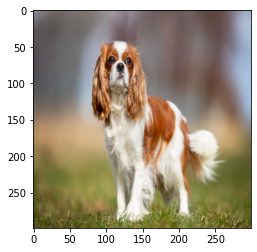

In [11]:
plt.imshow(train_x[1000]);
print(train_y[1000])

In [12]:
karakachanka_image_1 = imread('https://baubau.bg/thumbs/1/otglejdane-na-karakachanka.jpg')
karakachanka_image_2 = imread('https://baubau.bg/thumbs/1/interesni-fakti-za-karakachanka.JPG')
karakachanka_image_3 = imread('https://baubau.bg/thumbs/1/anatomichni-osobenosti-na-karakachanka.jpg')
karakachanka_image_4 = imread('https://littlebg.com/wp-content/uploads/2017/02/%D0%BA%D0%B0%D1%80%D0%B0%D0%BA%D0%B0%D1%87%D0%B0%D0%BD%D0%BA%D0%B01.jpg')
karakachanka_image_5 = imread('https://www.monitor.bg/web/files/articles/140870/gallery/thumb_768x0_%D0%BA%D1%83%D1%87%D0%B5.jpg')
karakachanka_image_6 = imread('https://ibazar.focus.bg/photosbazar/0c/pics/0c0bfde84789ac6855f0910e5cf9d2f0.jpg')
karakachanka_image_7 = imread('https://img2.novini.bg/uploads/news_pictures/2011-34/big/karakachanka-razkysa-liceto-na-jena-19454.jpg')
karakachanka_image_8 = imread('http://1.bp.blogspot.com/_cJy8yDJy6Ig/TGezWpI9D9I/AAAAAAAAGqU/-w1qLV0G58o/s1600/pic09_1024x768.JPG')
karakachanka_image_9 = imread('https://margarita99.blog.bg/photos/170109/original/022211686(1).jpg')
karakachanka_image_10 = imread('https://frankfurt.apollo.olxcdn.com/v1/files/ozpgs354q4uk-BG/image;s=585x461')
karakachanka_image_11 = imread('https://baubau.bg/thumbs/1/kakva-e-kozinata-na-karakachankata.jpg')
karakachanka_image_12 = imread('https://baubau.bg/thumbs/1/vanshen-vid-na-karakachansko-kuche.jpg')


In [13]:
for i in range(1, 13):
  current = eval(f'karakachanka_image_{i}')
  current = current / 255
  current = resize(current, (IMG_LEN, IMG_LEN))
  label = tf.one_hot(120 , N_BREEDS)
  train_y.append(label)
  train_x.append(current)

Now let's do it again.

In [14]:
karakachanka_image_1 = imread('https://img2.novini.bg/uploads/news_pictures/2016-05/big/karakachanka-naryfa-petoklasnik-v-sandanski-355129.jpg')
karakachanka_image_2 = imread('https://ibazar.focus.bg/photosbazar/0c/pics/0c0bfde84789ac6855f0910e5cf9d2f0.jpg')
karakachanka_image_3 = imread('https://cdn1.focus.bg/bazar/4f/pics/4fb3f3ed3792d7fee933e2fecf0e95da.jpg')
karakachanka_image_4 = imread('https://www.findupet.com/uploads/petgalleryfile/images/420x315/12507627_1107402629283328_4703545556419183587_n.jpg')
karakachanka_image_5 = imread('https://www.findupet.com/uploads/petgalleryfile/images/940x640/DSC_0113.jpg')
karakachanka_image_6 = imread('https://media.snimka.bg/2579/011414100.jpg?r=0')
karakachanka_image_7 = imread('https://i.ytimg.com/vi/_p1Ru0XaqA8/maxresdefault.jpg')
karakachanka_image_8 = imread('https://i.pinimg.com/originals/a4/a9/73/a4a973694609086466da7aed7297868d.jpg')
karakachanka_image_9 = imread('https://i.imgur.com/mNKiuIml.jpg')
karakachanka_image_10 = imread('https://frankfurt.apollo.olxcdn.com/v1/files/5iyfid38jxst-BG/image;s=585x461')
karakachanka_image_11 = imread('http://karakachan.org/database/files/dog_gallery/big/131_12052016142500.jpg')
karakachanka_image_12 = imread('https://i.pinimg.com/474x/a4/c1/0a/a4c10aaf7cadc54cf68f5b7bb5add378.jpg')

In [15]:
for i in range(1, 13):
  current = eval(f'karakachanka_image_{i}')
  current = current / 255
  current = resize(current, (IMG_LEN, IMG_LEN))
  label = tf.one_hot(120 , N_BREEDS)
  train_y.append(label)
  train_x.append(current)

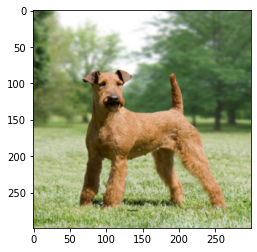

In [16]:
plt.imshow(train_x[1009])

In [17]:
train_x = np.array(train_x)

In [18]:
train_y = np.array(train_y)

In [19]:
save_np= open(f"{retrieved_batches}_pics.pickle","wb")
pickle.dump(train_x, save_np)
save_np.close()

In [20]:
save_np= open(f"{retrieved_batches}_labels.pickle","wb")
pickle.dump(train_y, save_np)
save_np.close()